In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170498071/170498071 [==============================] - 189s 1us/step


In [6]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
single_image=x_train[0]

In [5]:
single_image.shape

(32, 32, 3)

In [7]:
single_image

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [8]:
single_image.max()

255

In [9]:
single_image.min()

0

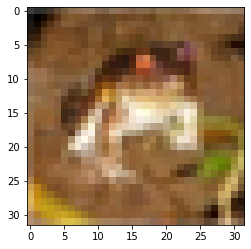

In [10]:
plt.imshow(single_image)

In [11]:
# normalisation

x_train=x_train/255


In [12]:
x_test=x_test/255

In [14]:
x_test.shape

(10000, 32, 32, 3)

In [15]:
y_test.shape

(10000, 1)

In [16]:
y_train.shape

(50000, 1)

In [18]:
from tensorflow.keras.utils import to_categorical

In [19]:
y_cat_test=to_categorical(y_test,num_classes=10)

In [20]:
y_cat_train=to_categorical(y_train,num_classes=10)

In [21]:
from tensorflow.keras.models import Sequential

In [22]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [23]:
model=Sequential()

# convolutional layer 1
model.add(Conv2D(filters=32,kernel_size=(4,4),strides=(1, 1),padding='valid',input_shape=(32,32,3),activation='relu'))

# pooling layer 1
model.add(MaxPool2D(pool_size=(2,2)))

# convolutional layer 2
model.add(Conv2D(filters=32,kernel_size=(4,4),strides=(1, 1),padding='valid',input_shape=(32,32,3),activation='relu'))

# pooling layer 2
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Flatten()) # 32*32
model.add(Dense(256,activation='relu'))


#OUTPUT LAYER-MULTI ClASS hence Output suhould be 'Softmax'
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)               2

In [26]:
from tensorflow.keras.callbacks import EarlyStopping

In [27]:
early_stop=EarlyStopping(monitor='val_loss',patience=2)

In [28]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.5140 - accuracy: 0.4503 - val_loss: 1.3238 - val_accuracy: 0.5218
Epoch 2/10
1563/1563 [==============================] - 30s 20ms/step - loss: 1.1946 - accuracy: 0.5774 - val_loss: 1.1720 - val_accuracy: 0.5834
Epoch 3/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.0453 - accuracy: 0.6362 - val_loss: 1.0613 - val_accuracy: 0.6286
Epoch 4/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.9361 - accuracy: 0.6724 - val_loss: 1.0089 - val_accuracy: 0.6510
Epoch 5/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.8519 - accuracy: 0.7032 - val_loss: 1.0476 - val_accuracy: 0.6415
Epoch 6/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.7871 - accuracy: 0.7262 - val_loss: 0.9820 - val_accuracy: 0.6689
Epoch 7/10
1563/1563 [==============================] - 29s 18ms/step - loss: 0.7202 - accuracy: 0.7484 - val_loss: 0.9957 -

In [29]:
metrics=pd.DataFrame(model.history.history)

In [30]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.513982,0.45030,1.323812,0.5218
1,1.194553,0.57738,1.171956,0.5834
2,1.045341,0.63624,1.061307,0.6286
3,0.936117,0.67244,1.008890,0.6510
4,0.851864,0.70320,1.047630,0.6415
5,0.787100,0.72620,0.982014,0.6689
6,0.720158,0.74840,0.995704,0.6673
7,0.659172,0.77090,0.996670,0.6733


<AxesSubplot:>

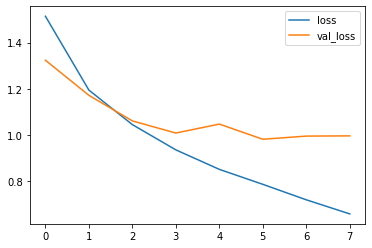

In [31]:
metrics[['loss','val_loss']].plot()

<AxesSubplot:>

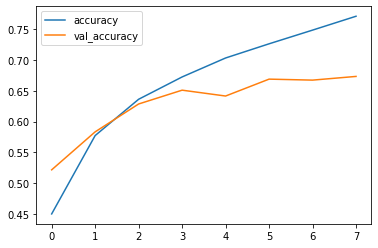

In [32]:
metrics[['accuracy','val_accuracy']].plot()

In [33]:
model.metrics_names

['loss', 'accuracy']

In [34]:
model.evaluate(x_test,y_cat_test,verbose=0)

[0.9966700077056885, 0.67330002784729]

In [35]:
from sklearn.metrics import confusion_matrix,classification_report

In [36]:
predictions = np.argmax(model.predict(x_test),axis=1)

313/313 [==============================] - 3s 8ms/step


In [37]:
print(classification_report(y_true=y_test,y_pred=predictions))

              precision    recall  f1-score   support

           0       0.69      0.76      0.72      1000
           1       0.81      0.78      0.79      1000
           2       0.53      0.60      0.56      1000
           3       0.51      0.45      0.48      1000
           4       0.68      0.56      0.61      1000
           5       0.56      0.59      0.57      1000
           6       0.75      0.75      0.75      1000
           7       0.75      0.69      0.72      1000
           8       0.79      0.75      0.77      1000
           9       0.70      0.81      0.75      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000



In [38]:
confusion_matrix(y_test,predictions)

array([[757,  22,  56,  23,  13,   6,   6,   8,  61,  48],
       [ 34, 779,  14,  12,   2,   6,   7,   3,  21, 122],
       [ 70,  12, 600,  56,  59,  80,  49,  34,  23,  17],
       [ 31,  12,  96, 452,  58, 189,  72,  36,  22,  32],
       [ 27,   5, 128,  72, 560,  49,  59,  71,  15,  14],
       [ 23,   2,  70, 154,  42, 592,  28,  58,  14,  17],
       [ 17,   9,  80,  57,  29,  36, 746,  14,   5,   7],
       [ 32,  10,  51,  38,  49,  80,  10, 694,   6,  30],
       [ 77,  41,  28,  18,   6,  10,   8,   4, 746,  62],
       [ 33,  74,  11,   9,   5,  14,   9,   8,  30, 807]], dtype=int64)

In [39]:
import seaborn as sns

<AxesSubplot:>

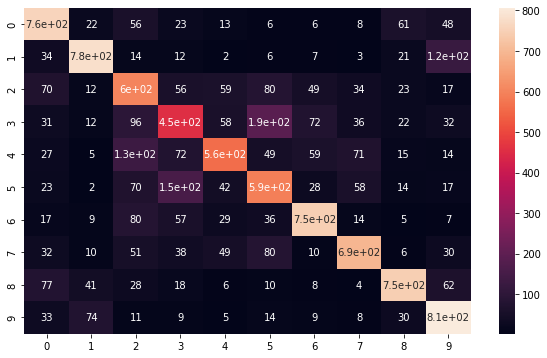

In [40]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

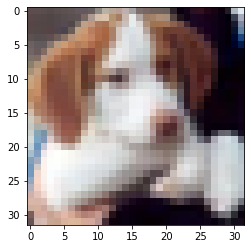

In [48]:
# How to add new image and check it (example)
my_num=x_test[16]
plt.imshow(my_num)

In [49]:
y_test[16]

array([5], dtype=uint8)

In [50]:
#num_image,width,height,color_channel

np.argmax(model.predict(my_num.reshape(1,32,32,3)),axis=1)

1/1 [==============================] - 0s 19ms/step


array([5], dtype=int64)